# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [4]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [5]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 554


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [6]:
# Set the API base URL
url = f"http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID={weather_api_key}"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | isafjordur
Processing Record 2 of Set 1 | ta`u
Processing Record 3 of Set 1 | cooma
Processing Record 4 of Set 1 | talnakh
Processing Record 5 of Set 1 | grytviken
Processing Record 6 of Set 1 | stanley
Processing Record 7 of Set 1 | pemba
Processing Record 8 of Set 1 | olonkinbyen
Processing Record 9 of Set 1 | saipan
Processing Record 10 of Set 1 | sychevka
Processing Record 11 of Set 1 | prince rupert
Processing Record 12 of Set 1 | port-aux-francais
Processing Record 13 of Set 1 | tiksi
Processing Record 14 of Set 1 | mount gambier
Processing Record 15 of Set 1 | patos
Processing Record 16 of Set 1 | port mathurin
Processing Record 17 of Set 1 | ushuaia
Processing Record 18 of Set 1 | fale old settlement
Processing Record 19 of Set 1 | hithadhoo
Processing Record 20 of Set 1 | blackmans bay
Processing Record 21 of Set 1 | escanaba
Processing Record 22 of Set 1 | kyzyl-burun
City not found. Sk

In [7]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          530
Lat           530
Lng           530
Max Temp      530
Humidity      530
Cloudiness    530
Wind Speed    530
Country       530
Date          530
dtype: int64

In [8]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,isafjordur,66.0755,-23.1240,40.24,65,94,8.43,IS,1698702814
1,ta`u,-14.2336,-169.5144,80.40,81,28,25.64,AS,1698702775
2,cooma,-36.2333,149.1333,52.11,33,0,14.32,AU,1698702814
3,talnakh,69.4865,88.3972,1.20,97,100,6.44,RU,1698702814
4,grytviken,-54.2811,-36.5092,38.23,81,14,9.37,GS,1698702815


In [9]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [10]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,isafjordur,66.0755,-23.1240,40.24,65,94,8.43,IS,1698702814
1,ta`u,-14.2336,-169.5144,80.40,81,28,25.64,AS,1698702775
2,cooma,-36.2333,149.1333,52.11,33,0,14.32,AU,1698702814
3,talnakh,69.4865,88.3972,1.20,97,100,6.44,RU,1698702814
4,grytviken,-54.2811,-36.5092,38.23,81,14,9.37,GS,1698702815


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

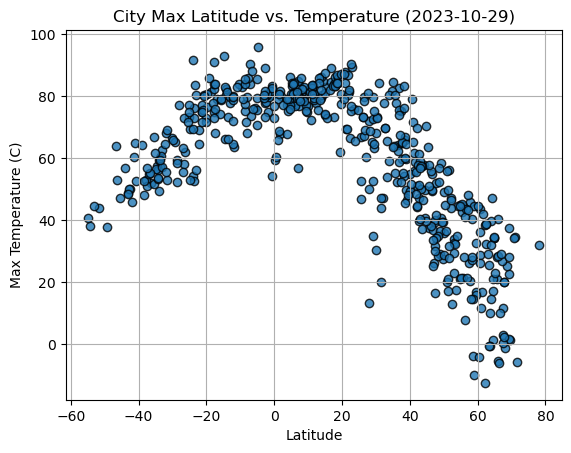

In [11]:
# Build scatter plot for latitude vs. temperature
# YOUR CODE HERE
lat = city_data_df["Lat"]
max_temp = city_data_df["Max Temp"]

plt.scatter(lat, max_temp, marker= "o", label="Cities", edgecolor = "black",alpha =0.8)
# Incorporate the other graph properties
# YOUR CODE HERE
plt.title ("City Max Latitude vs. Temperature (2023-10-29)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid(True)
# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

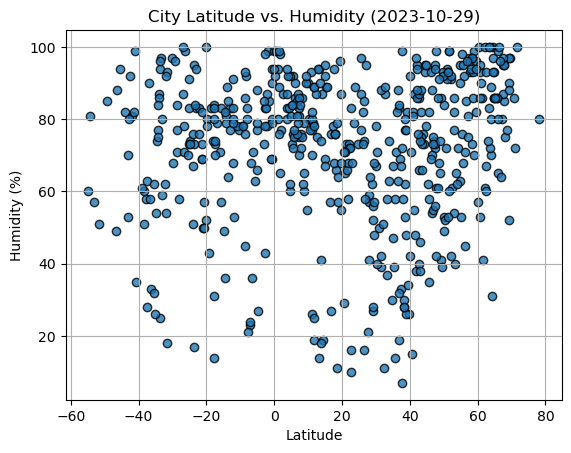

In [12]:
# Build the scatter plots for latitude vs. humidity
# YOUR CODE HERE
humidity = city_data_df["Humidity"]

plt.scatter (lat, humidity,marker= "o", label="Cities", edgecolor = "black",alpha =0.8 )
# Incorporate the other graph properties
# YOUR CODE HERE
plt.title("City Latitude vs. Humidity (2023-10-29)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)
# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

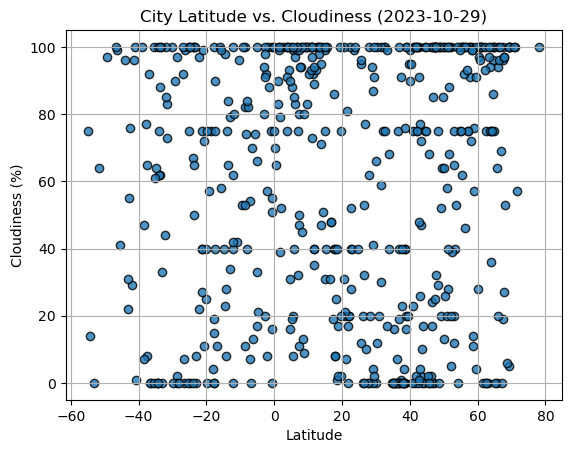

In [13]:
# Build the scatter plots for latitude vs. cloudiness
# YOUR CODE HERE
cloudiness = city_data_df["Cloudiness"]

plt.scatter (lat, cloudiness,marker= "o", label="Cities", edgecolor = "black",alpha =0.8 )
# Incorporate the other graph properties
# YOUR CODE HERE
plt.title("City Latitude vs. Cloudiness (2023-10-29)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)
# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

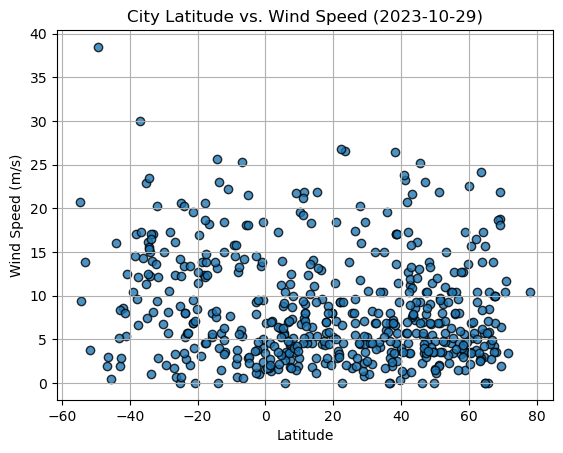

In [14]:
# Build the scatter plots for latitude vs. wind speed
# YOUR CODE HERE
wind_speed = city_data_df["Wind Speed"]

plt.scatter (lat, wind_speed,marker= "o", label="Cities", edgecolor = "black",alpha =0.8)
# Incorporate the other graph properties
# YOUR CODE HERE
plt.title("City Latitude vs. Wind Speed (2023-10-29)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid(True)
# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [32]:
# Define a function to create Linear Regression plots
# YOUR CODE HERE
def plot_linear_regression(x_values,y_values,x_label,y_label,text_coordinates):

    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y =" + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    plt.scatter(x_values,y_values)
    plt.plot(x_values, regress_values, "r-")
    plt.annotate(line_eq,text_coordinates, fontsize=15, color="red")
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    print(f"The r-squared is: {rvalue}")
    plt.show()

In [16]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
# YOUR CODE HERE
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,isafjordur,66.0755,-23.1240,40.24,65,94,8.43,IS,1698702814
3,talnakh,69.4865,88.3972,1.20,97,100,6.44,RU,1698702814
5,stanley,54.8680,-1.6985,44.76,95,75,4.61,GB,1698702815
7,olonkinbyen,70.9221,-8.7187,34.61,72,100,11.70,SJ,1698702770
8,saipan,15.1355,145.7010,83.10,89,40,21.85,MP,1698702815


In [18]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
# YOUR CODE HERE
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]
# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,ta`u,-14.2336,-169.5144,80.40,81,28,25.64,AS,1698702775
2,cooma,-36.2333,149.1333,52.11,33,0,14.32,AU,1698702814
4,grytviken,-54.2811,-36.5092,38.23,81,14,9.37,GS,1698702815
6,pemba,-12.9740,40.5178,77.90,83,34,5.73,MZ,1698702815
11,port-aux-francais,-49.3500,70.2167,37.80,85,97,38.48,TF,1698702816


###  Temperature vs. Latitude Linear Regression Plot

The r-squared is: -0.8471745309397379


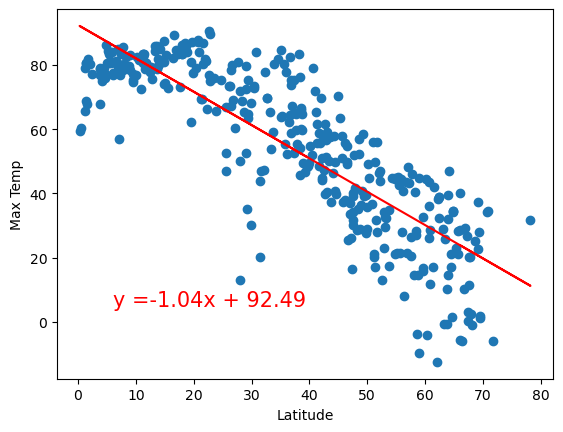

In [33]:
# Linear regression on Northern Hemisphere
# YOUR CODE HERE
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
plot_linear_regression(x_values,y_values,"Latitude","Max Temp", (6,5))

The r-squared is: 0.7965032752555594


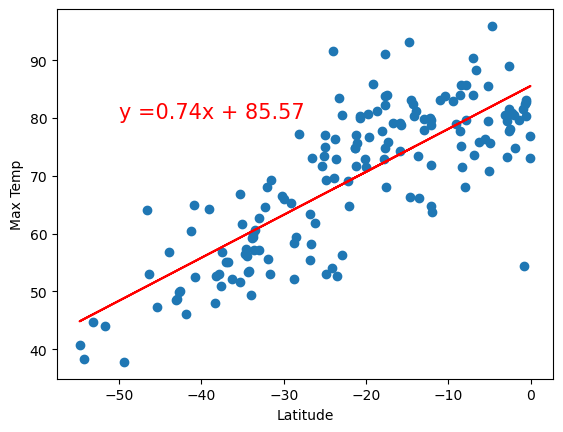

In [36]:
# Linear regression on Southern Hemisphere
# YOUR CODE HERE
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
plot_linear_regression(x_values,y_values,"Latitude","Max Temp", (-50,80))

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r-squared is: 0.11887141508904911


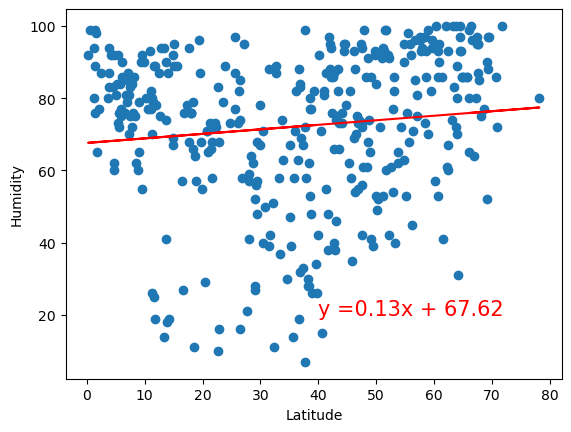

In [37]:
# Northern Hemisphere
# YOUR CODE HERE
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
plot_linear_regression(x_values,y_values,"Latitude","Humidity", (40,20))

The r-squared is: 0.09620960395520245


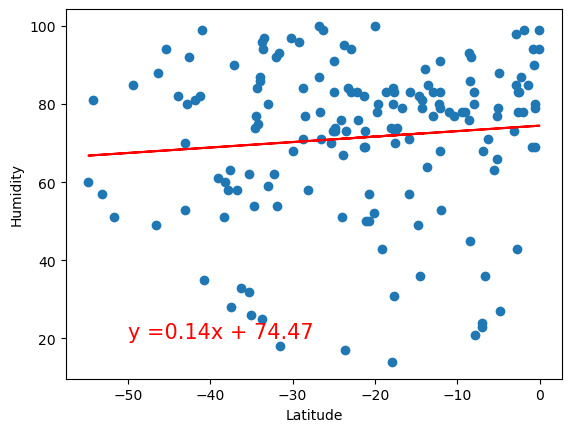

In [39]:
# Southern Hemisphere
# YOUR CODE HERE
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
plot_linear_regression(x_values,y_values,"Latitude","Humidity", (-50,20))

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-squared is: 0.003993661387511323


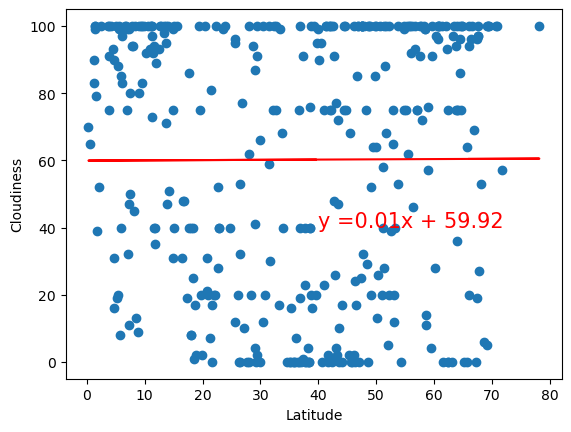

In [42]:
# Northern Hemisphere
# YOUR CODE HERE
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
plot_linear_regression(x_values,y_values,"Latitude","Cloudiness", (40,40))

The r-squared is: 0.051321285652005645


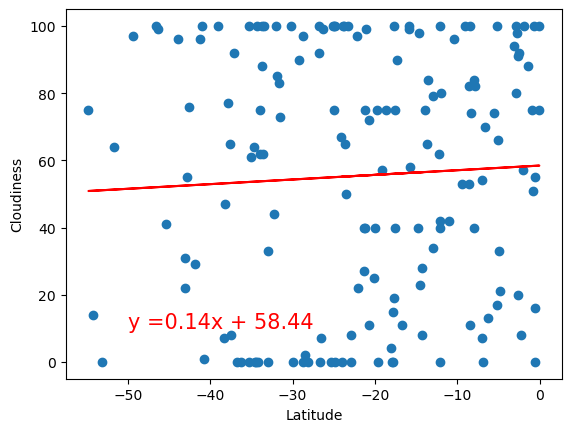

In [45]:
# Southern Hemisphere
# YOUR CODE HERE
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
plot_linear_regression(x_values,y_values,"Latitude","Cloudiness", (-50,10))

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-squared is: 0.06511229954010112


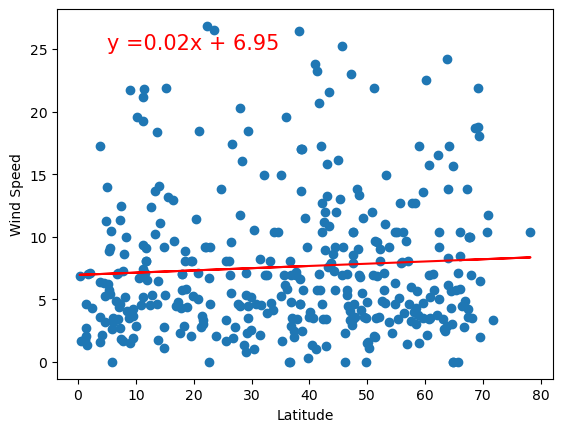

In [48]:
# Northern Hemisphere
# YOUR CODE HERE
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
plot_linear_regression(x_values,y_values,"Latitude","Wind Speed", (5,25))

The r-squared is: -0.17299632057329503


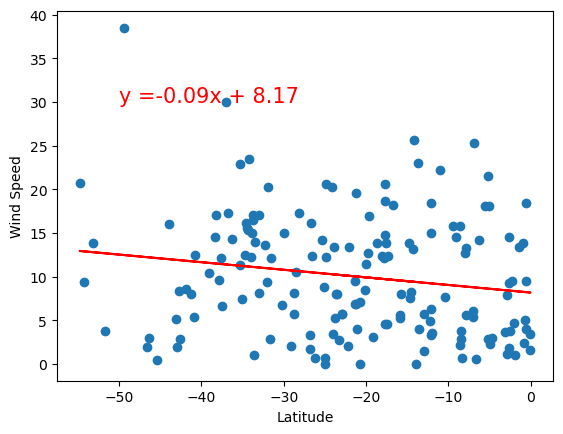

In [50]:
# Southern Hemisphere
# YOUR CODE HERE
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
plot_linear_regression(x_values,y_values,"Latitude","Wind Speed", (-50,30))

**Discussion about the linear relationship:** YOUR RESPONSE HERE